In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import warnings
warnings.filterwarnings('ignore')


#Load data

df = pd.read_csv("C:/Users/Arnord/Documents/cleaned_all_phones.csv")     

In [2]:
#Exploring Data

df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [3]:
df.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [4]:
#checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

phone_name - 0%
brand - 0%
os - 0%
inches - 0%
resolution - 0%
battery - 0%
battery_type - 0%
ram(GB) - 0%
announcement_date - 0%
weight(g) - 0%
storage(GB) - 0%
video_720p - 0%
video_1080p - 0%
video_4K - 0%
video_8K - 0%
video_30fps - 0%
video_60fps - 0%
video_120fps - 0%
video_240fps - 0%
video_480fps - 0%
video_960fps - 0%
price(USD) - 0%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

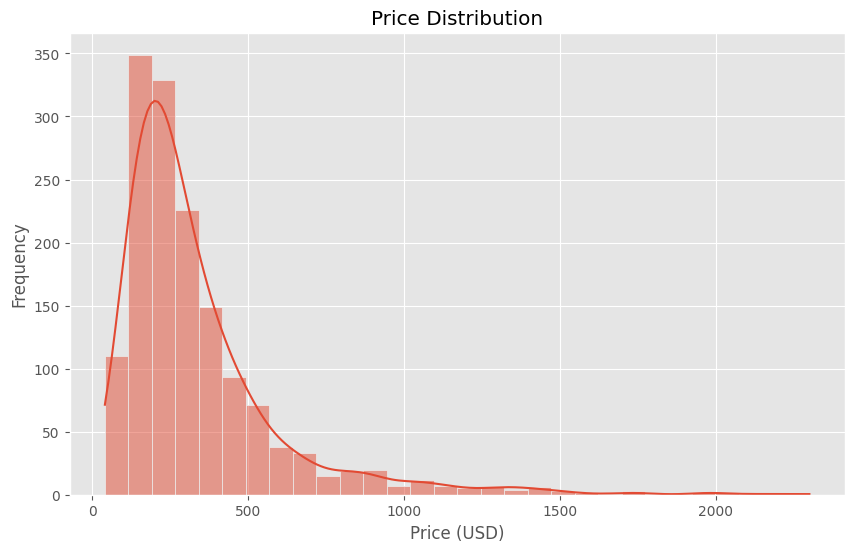

In [6]:
# Price distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['price(USD)'], bins=30, kde=True)
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

The histogram shows that the price distribution is skewed to the right, meaning that most of the phone models have a low to medium price range, while only a few have a high price range

In [13]:
df['announcement_date'] = pd.to_datetime(df['announcement_date'])

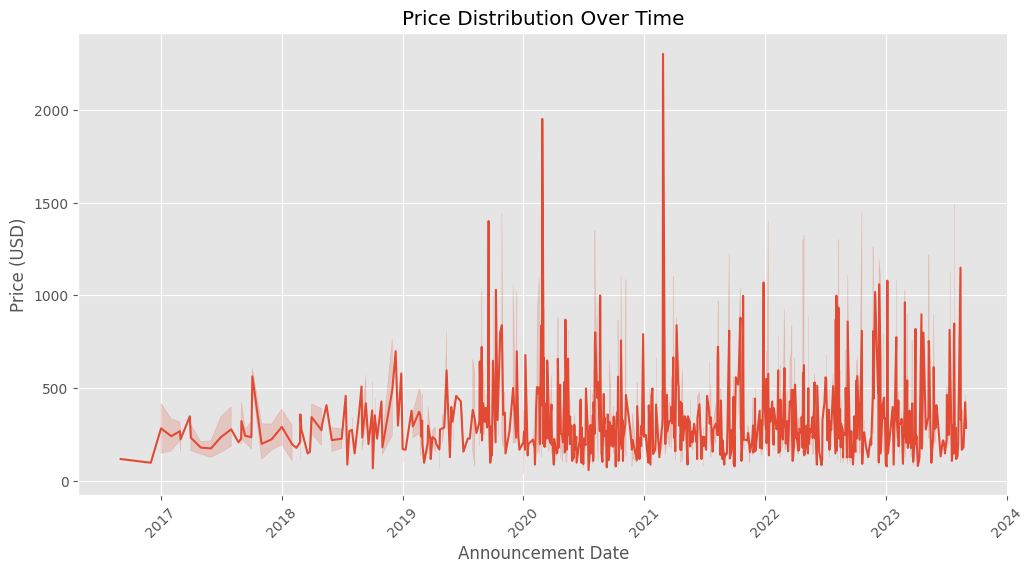

In [14]:
# Price Distribution Over Time

plt.figure(figsize=(12, 6))
sns.lineplot(x='announcement_date', y='price(USD)', data=df)
plt.xlabel('Announcement Date')
plt.ylabel('Price (USD)')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)
plt.show()

 - Newer phones tend to be more expensive than older phones, as they usually have more advanced features, better performance, and higher quality. 
 - Older phones tend to depreciate in value over time, as they become outdated, less competitive, and less attractive to consumers.
 - Some phones may increase in value over time, if they are rare, collectible, or have some historical or cultural significance.

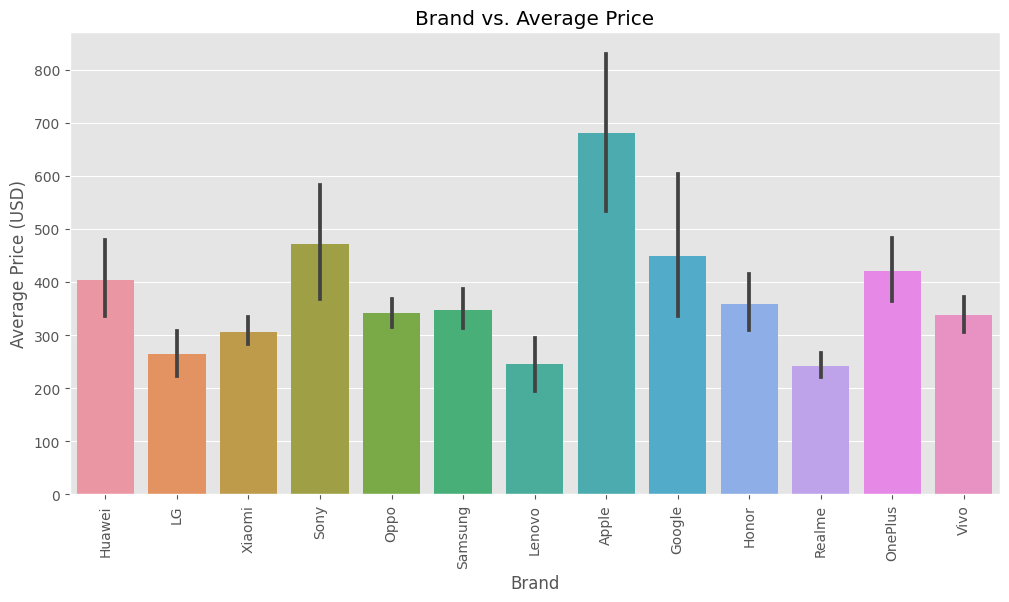

In [7]:
# Brand vs. Average Price

plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price(USD)', data=df)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.title('Brand vs. Average Price')
plt.show()

The most expensive brand is Apple.. The cheapest brand is Realme.

In [4]:
# Define conditions for each OS category

conditions = [
    df['os'].str.contains('Android', case=False, na=False),
    df['os'].str.contains('iOS', case=False, na=False),
    df['os'].str.contains('EMUI', case=False, na=False),
    df['os'].str.contains('Tizen', case=False, na=False)
]

# Define the corresponding OS labels

os_labels = ['Android', 'iOS', 'EMUI', 'Tizen']

# Use np.select to create a new 'os_category' column

df['os_category'] = np.select(conditions, os_labels, default='Other')

In [9]:
# Group the data by OS and calculate the average price for each OS

average_price_by_os = df.groupby('os_category')['price(USD)'].mean().sort_values(ascending=False)

# Convert the result to a DataFrame for plotting

average_price_by_os = average_price_by_os.reset_index()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'iOS'),
  Text(1, 0, 'EMUI'),
  Text(2, 0, 'Android'),
  Text(3, 0, 'Tizen')])

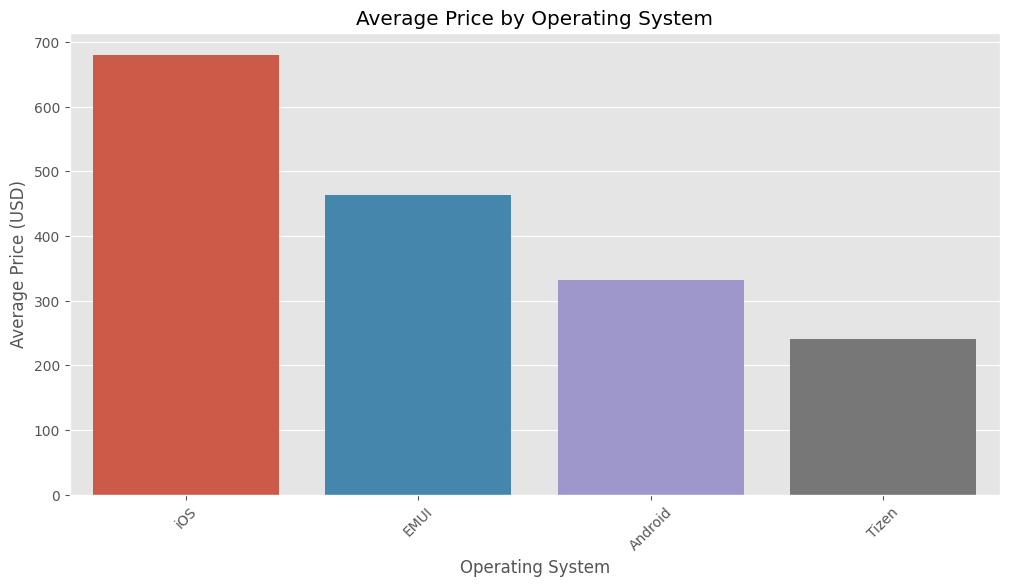

In [10]:
# Create a bar chart using Seaborn

plt.figure(figsize=(12, 6))
sns.barplot(x='os_category', y='price(USD)', data=average_price_by_os, order=average_price_by_os['os_category'])
plt.xlabel('Operating System')
plt.ylabel('Average Price (USD)')
plt.title('Average Price by Operating System')
plt.xticks(rotation=45)

The operating system (OS) also affects the price, as phones with iOS are generally more expensive than phones with Android, Emui or Tizen

  os_category resolution  price(USD)
0     Android  1840x2208     1750.00
1        EMUI  2200x2480     1995.99
2       Tizen    480x800      240.00
3         iOS  1290x2796     1213.33


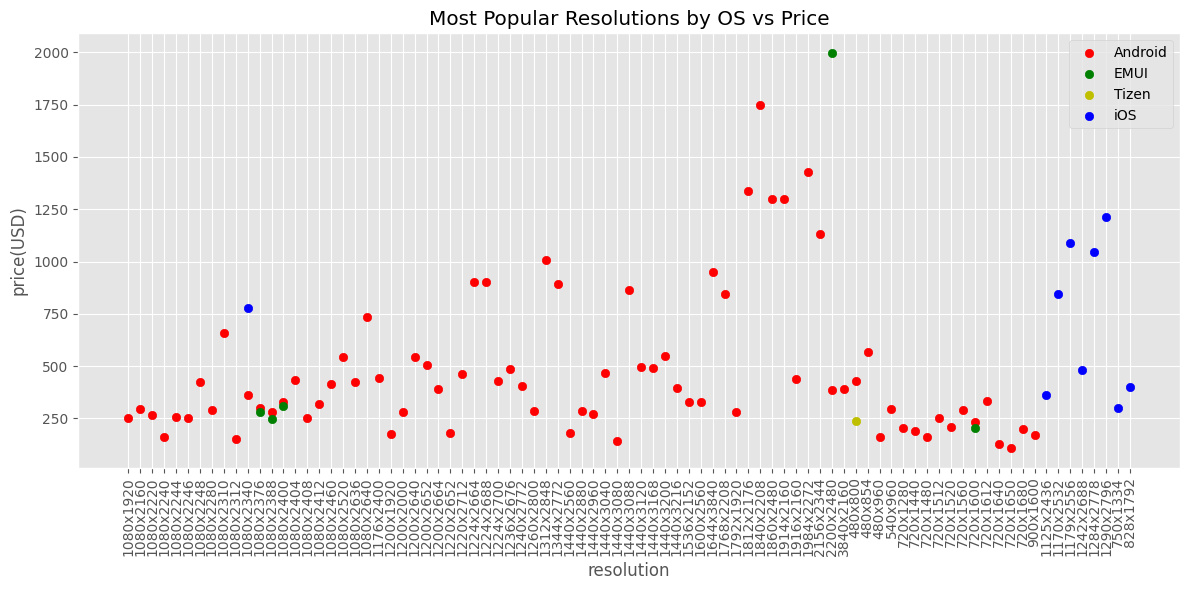

In [12]:
#Find the most popular resolution for each OS and calculate the mean price

df_mean_price = df.groupby(['os_category','resolution'])['price(USD)'].mean().reset_index()

#Sort by os and descending mean price

df_mean_price_sorted = df_mean_price.sort_values(['os_category','price(USD)'], ascending=[True, False])

#Get most popular resolution for each os

df_most_popular = df_mean_price_sorted.groupby('os_category').first().reset_index()

print(df_most_popular)

#Plotting

plt.figure(figsize=(12, 6))
colors = {'Android': 'r', 'iOS': 'b', 'EMUI':'g', 'Tizen': 'y'}
for os_category in df_mean_price['os_category'].unique():
    os_data = df_mean_price[df_mean_price['os_category'] == os_category]
    plt.scatter(os_data['resolution'], os_data['price(USD)'],color=colors[os_category], label=os_category)
plt.title('Most Popular Resolutions by OS vs Price')
plt.xlabel('resolution')
plt.ylabel('price(USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()  
plt.show()

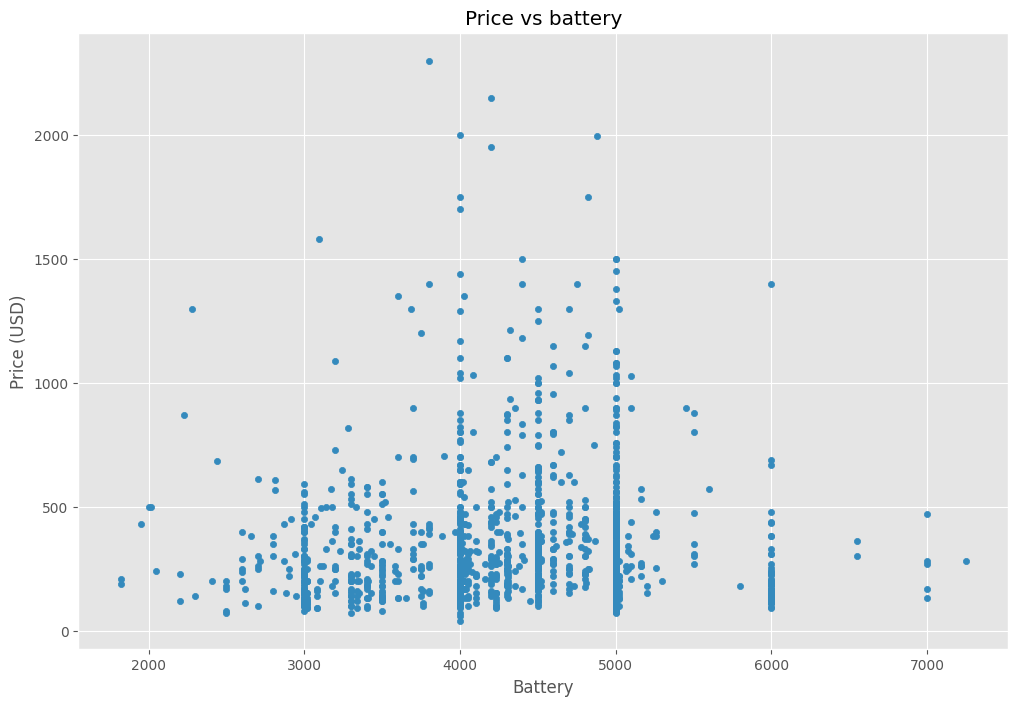

In [17]:
# Create a scatter plot of the price vs battery

df.plot(x='battery', y='price(USD)', kind="scatter")
plt.title("Price vs battery")
plt.xlabel("Battery")
plt.ylabel("Price (USD)")
plt.show()

There is a positive correlation between the battery capacity and the price, meaning that phones with higher battery capacity tend to be more expensive. However, there are some outliers.

  os_category battery_type  price(USD)
0     Android        Li-Po  334.891515
1        EMUI        Li-Po  462.520000
2       Tizen       Li-Ion  240.000000
3         iOS       Li-Ion  680.037273


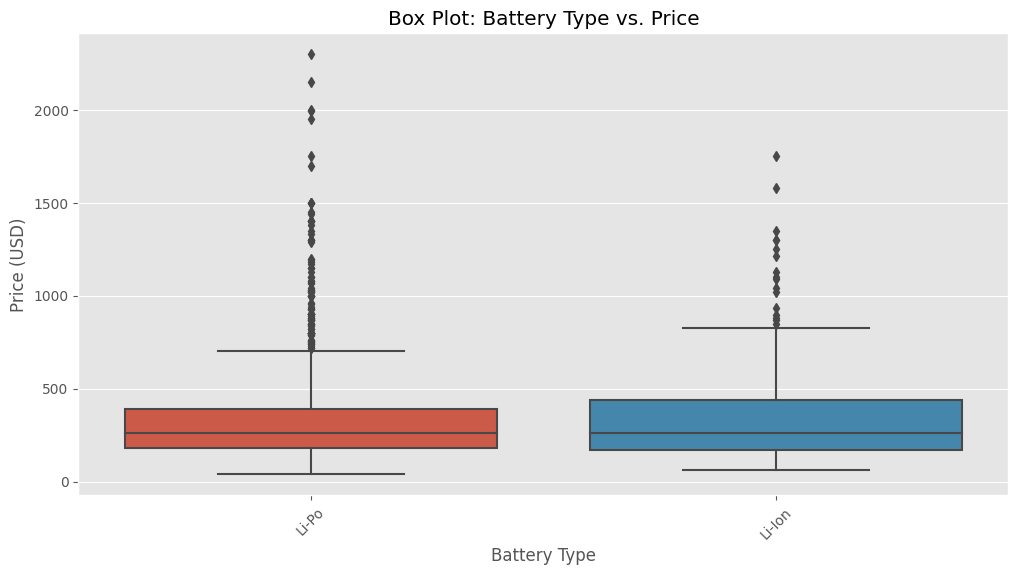

In [8]:

battery_type_price = df.groupby(['os_category','battery_type'])['price(USD)'].mean().reset_index()

#Sort by os and descending mean price

battery_type_price_sorted = battery_type_price.sort_values(['os_category','price(USD)'], ascending=[True, False])

#Get most popular battery-TYPE for each os

df_most_popular = battery_type_price_sorted.groupby('os_category').first().reset_index()

print(df_most_popular)

#Plotting

plt.figure(figsize=(12, 6))
sns.boxplot(x='battery_type', y='price(USD)', data=df)
plt.xlabel('Battery Type')
plt.ylabel('Price (USD)')
plt.title('Box Plot: Battery Type vs. Price')
plt.xticks(rotation=45)
plt.show()

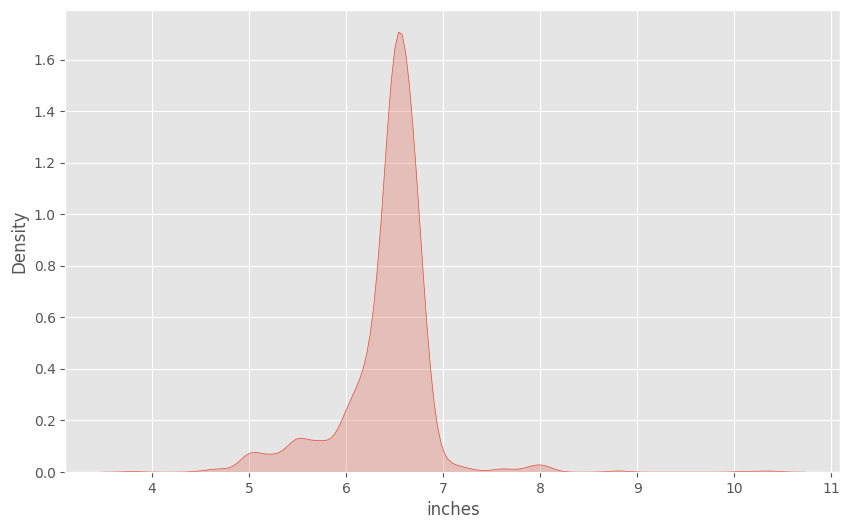

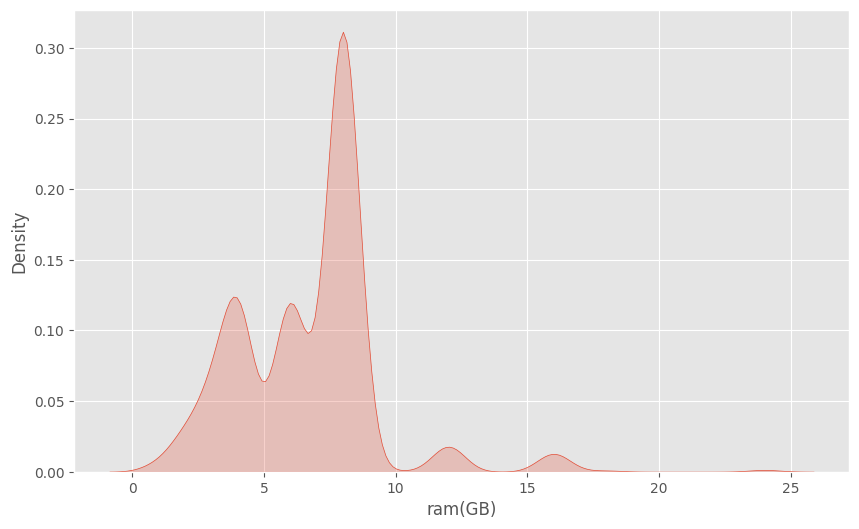

In [23]:
columns = ['inches', 'ram(GB)']
for i in columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[i],shade=True);

 - The most common phone screens are around 6 inches. The least common phone screens are 7 inches and above.
 - The most common ram amount is 8 GB. The least common ram amount is 10 GB.

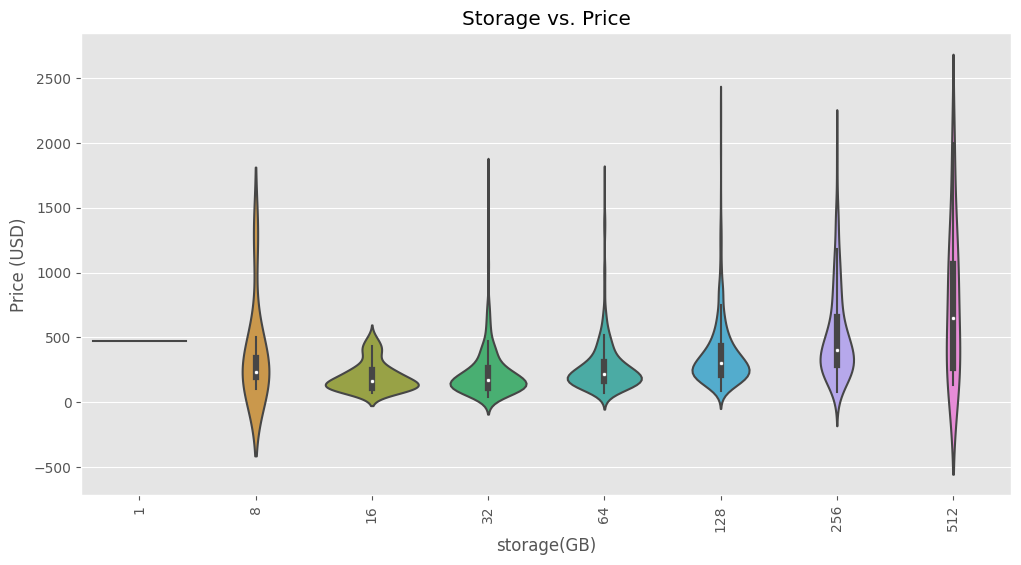

In [20]:
#Violin Plot

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='storage(GB)', y='price(USD)')
plt.xlabel('storage(GB)')
plt.ylabel('Price (USD)')
plt.title('Storage vs. Price')
plt.xticks(rotation=90)
plt.show()

The phones with higher storage capacity tend to be more expensive. However, there are some outliers, such as phones with a storage of 512 GB. The most common storage capacity is 128 GB.

Phones with the Least Weight per OS and Their Prices:
     os_category  weight(g)  price(USD)
69       Android      130.0      500.00
1296        EMUI      184.0      311.87
28         Tizen      143.0      240.00
701          iOS      135.0      868.24


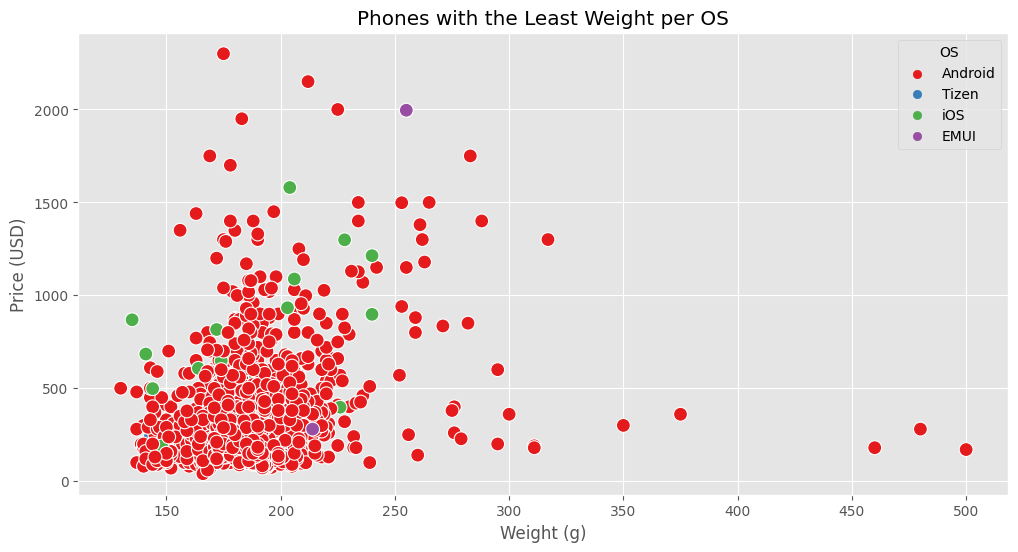

In [31]:
#Grouping by os and finding the minimum weight for each group

min_weight = df.groupby('os_category')['weight(g)'].min()

#Getting the price of the minimum weight for each os

result = df.loc[df.groupby('os_category')['weight(g)'].idxmin(),['os_category', 'weight(g)', 'price(USD)']]

print("Phones with the Least Weight per OS and Their Prices:")
print(result)

#Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='weight(g)', y='price(USD)', hue='os_category', palette='Set1', s=100)
plt.xlabel('Weight (g)')
plt.ylabel('Price (USD)')
plt.title('Phones with the Least Weight per OS')
plt.legend(title='OS', loc='upper right')
plt.show()

Combination with the Highest Mean Price: video_720p,video_1080p,video_4K,video_60fps,video_480fps,video_960fps
Highest Mean Price: 940.0
Combination with the Most Phones: video_1080p,video_30fps
Number of Phones in That Combination: 650
Mean Price for the Combination with the Most Phones: 251.4


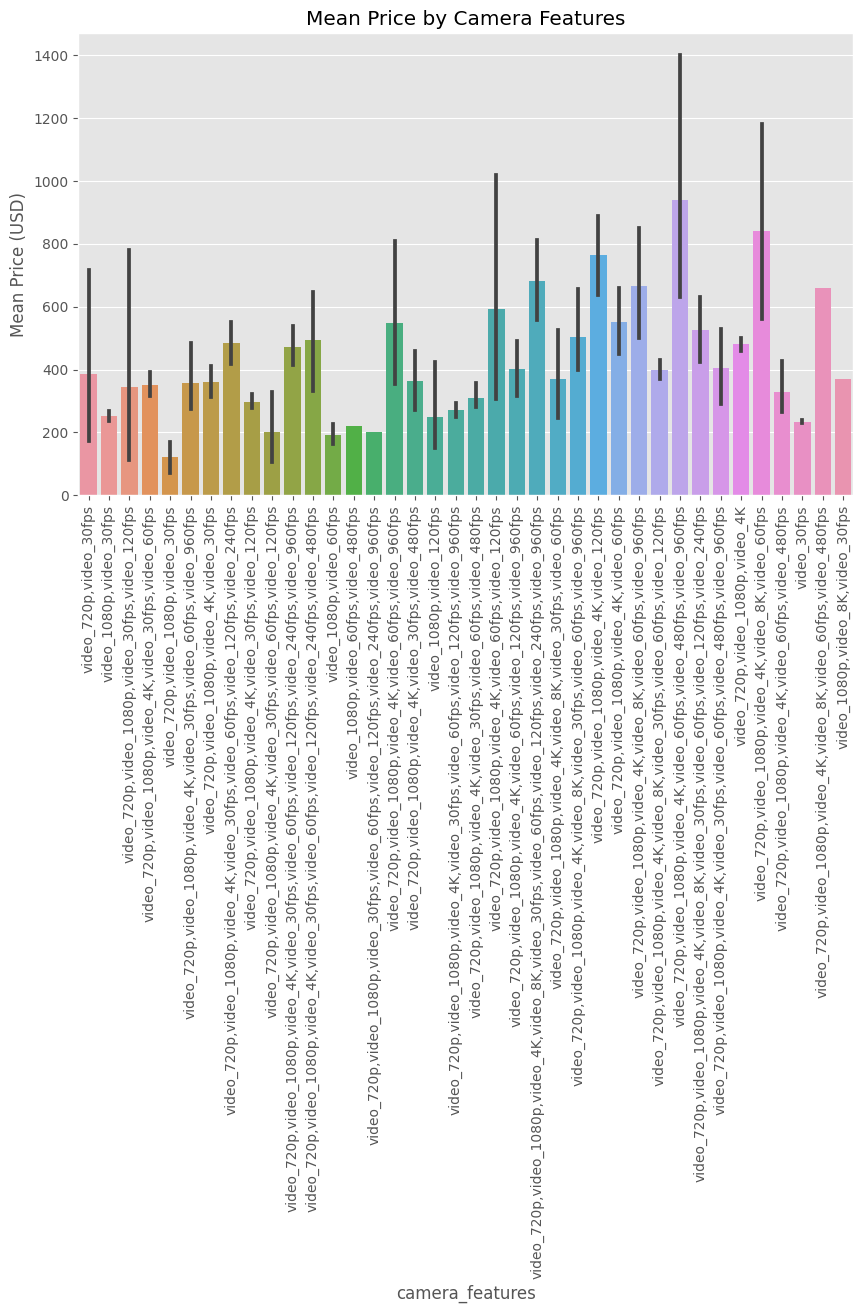

In [33]:
# Calculate a unique identifier for feature combinations using camera columns
df['camera_features'] = df[['video_720p', 'video_1080p', 'video_4K', 'video_8K', 'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps']].apply(lambda x: ','.join(x.index[x]), axis=1)

# Group by feature combination and calculate the mean price
combination_prices = df.groupby('camera_features')['price(USD)'].mean()

# Find the combination with the highest mean price
highest_price_combination = combination_prices.idxmax()
highest_price_mean = combination_prices.max()

# The combination with the most phones
combination_counts = df['camera_features'].value_counts()
most_phones_combination = combination_counts.idxmax()
most_phones_count = combination_counts.max()
mean_price_most_phones_combination = round(df[df['camera_features'] == most_phones_combination]['price(USD)'].mean(),1)

print("Combination with the Highest Mean Price:", highest_price_combination)
print("Highest Mean Price:", highest_price_mean)

# Print the combination with the most phones
print("Combination with the Most Phones:", most_phones_combination)
print("Number of Phones in That Combination:", most_phones_count)
print("Mean Price for the Combination with the Most Phones:", mean_price_most_phones_combination)

#Plot

plt.figure(figsize=(10, 6))
sns.barplot(x='camera_features', y='price(USD)', data=df)
plt.title('Mean Price by Camera Features')  # Rotate the title
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.xlabel('camera_features', fontsize=12)
plt.ylabel('Mean Price (USD)', fontsize=12)
plt.show()

In [34]:
df.corr(numeric_only = True)

,inches,battery,ram(GB),weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
inches,1.000000,0.673548,0.533778,0.779829,0.490416,0.165955,0.174925,0.206591,0.187832,-0.133289,0.194546,0.060650,0.064011,0.040616,0.101464,0.192769
battery,0.673548,1.000000,0.360098,0.547308,0.257782,-0.062071,0.145556,-0.031378,0.102949,-0.060585,-0.007118,-0.075968,-0.109209,-0.003269,-0.034046,-0.008050
ram(GB),0.533778,0.360098,1.000000,0.377633,0.699045,0.460389,0.105559,0.487847,0.267722,-0.195981,0.384060,0.260361,0.207934,0.071766,0.207713,0.293638
weight(g),0.779829,0.547308,0.377633,1.000000,0.377427,0.173867,0.071146,0.193385,0.228986,-0.123157,0.231560,0.083563,0.134970,0.032364,0.141533,0.214427
storage(GB),0.490416,0.257782,0.699045,0.377427,1.000000,0.423172,0.081169,0.444196,0.224257,-0.204475,0.360365,0.214213,0.223122,0.103273,0.158043,0.354250
video_720p,0.165955,-0.062071,0.460389,0.173867,0.423172,1.000000,-0.036965,0.980259,0.221074,-0.138648,0.607435,0.551388,0.362660,0.133344,0.383126,0.310810
video_1080p,0.174925,0.145556,0.105559,0.071146,0.081169,-0.036965,1.000000,0.082134,0.019003,-0.026991,0.059856,0.047200,0.030387,0.011912,0.032101,-0.004462
video_4K,0.206591,-0.031378,0.487847,0.193385,0.444196,0.980259,0.082134,1.000000,0.225649,-0.145389,0.619231,0.547845,0.366068,0.136219,0.387097,0.312411
video_8K,0.187832,0.102949,0.267722,0.228986,0.224257,0.221074,0.019003,0.225649,1.000000,-0.079633,0.311587,0.126410,0.247690,-0.018814,0.245053,0.218943
video_30fps,-0.133289,-0.060585,-0.195981,-0.123157,-0.204475,-0.138648,-0.026991,-0.145389,-0.079633,1.000000,-0.389409,0.074015,0.136967,-0.087743,-0.095670,-0.186677


<Axes: >

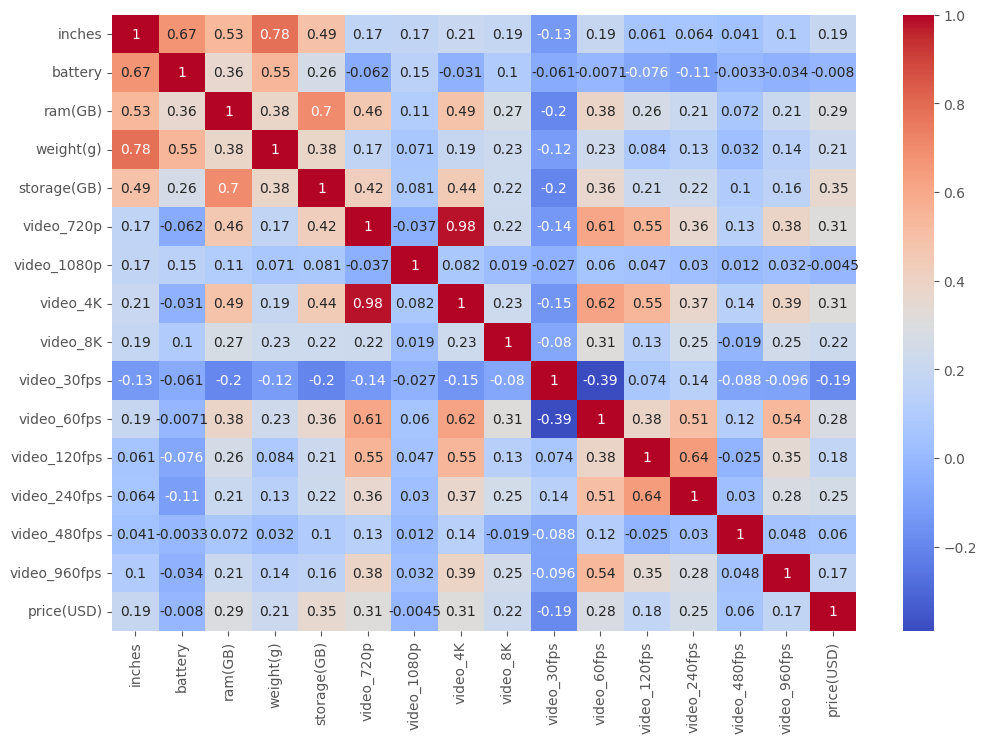

In [36]:
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='coolwarm')

# Summary

 - The data has 22 columns and 1513 rows, representing 1513 different phone models with various features and prices.
 - **Price Distribution**: The most common price range is between  200 and 150 (USD).
 - **Announcement date vs Price**: Newer phones are mostly more expensive than older ones, as they usually have more advanced features and better performance.
 - **Brand vs Price**: Apple brand is known for producing high-end phones that are more expensive than others.
 - **OS vs Price**: iPhones are  more expensive than Android, Emui or Tizen phones.
 - **Resolution vs Price**: most common resolution of phone screens differ with each brand. 
 - **Battery vs Price**: Phones with batteries with higher capacity tend to be more expensive than those with lower capacity.
 - **Battery Type vs Price**: the most common battery type for Android and EMUI is Li-Po and the most common battery type for Tizen and iOS is Li-Ion.
 - **Screen size vs Price**: Generally, phones with larger screens are more expensive than those with smaller screens. The most common phone screens are around 6 inches.
 - **RAM vs Price**: Phones with more RAM are more expensive than those with less RAM. The most common ram amount is 8 GB
 - **Storage vs Price**:  Phones with more storage tend to be more expensive than those with less storage. The most common storage capacity is 128 GB.
 - **Weight vs Price**:  There is no clear relationship between the phone weight and the price.
 - **Camera Features vs Price**: The camera features and price of phone are closely related. The more features it has the more expensive it is. 
